# Procesi v analitiki podatkov

## Designing Machine Learning Workflows

### Feature engineering

In [2]:
import pandas as pd

In [3]:
credit = pd.read_csv('data/credit.csv')

In [4]:
non_numeric_columns = ['checking_status',
                     'credit_history',
                     'purpose',
                     'savings_status',
                     'employment',
                     'personal_status',
                     'other_parties',
                     'property_magnitude',
                     'other_payment_plans',
                     'housing',
                     'job',
                     'own_telephone',
                     'foreign_worker']

In [5]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

In [9]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,4,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,good
1,0,48,3,4,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,bad
2,3,12,1,6,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,good
3,1,42,3,2,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,good
4,1,24,2,3,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,bad


In [10]:
credit.dtypes

checking_status            int64
duration                   int64
credit_history             int64
purpose                    int64
credit_amount              int64
savings_status             int64
employment                 int64
installment_commitment     int64
personal_status            int64
other_parties              int64
residence_since            int64
property_magnitude         int64
age                        int64
other_payment_plans        int64
housing                    int64
existing_credits           int64
job                        int64
num_dependents             int64
own_telephone              int64
foreign_worker             int64
class                     object
dtype: object

In [11]:
def feature_engineering(data, non_numeric_columns=None):
    for column in non_numeric_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
    
    return data

In [12]:
credit = pd.read_csv('data/credit.csv')
credit = feature_engineering(credit, non_numeric_columns)

### Model selection

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,4,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,good
1,0,48,3,4,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,bad
2,3,12,1,6,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,good
3,1,42,3,2,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,good
4,1,24,2,3,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,bad


In [15]:
X = credit.drop('class', 1)
y = credit['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
X_train.shape

(800, 20)

In [20]:
X_test.shape

(200, 20)

In [21]:
y_train.shape

(800,)

In [22]:
y_test.shape

(200,)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
#init
rf_model = RandomForestClassifier(random_state=2, n_estimators=10)
#fit
rf_model.fit(X_train, y_train)
#predict
rf_prediction = rf_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, rf_prediction)*100

In [29]:
print(f'Accuracy in {accuracy}%.')

Accuracy in 74.0%.


In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
abc_model = AdaBoostClassifier(random_state=2)
abc_model.fit(X_train, y_train)
abc_prediction = abc_model.predict(X_test)
accuracy = accuracy_score(y_test, abc_prediction)*100
print(f'Accuracy in {accuracy}%.')

Accuracy in 75.0%.


<img src="images/Screenshot from 2019-11-18 16-18-27.png">

### Grid search CV for model complexity

Define the parameter grid as described in the code comment and create a grid object with a RandomForestClassifier().

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50, 10)}

grid = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv=10) 
grid_model_result = grid.fit(X,y)

In [49]:
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.758000 using {'n_estimators': 20}


In [47]:
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_prediction)*100
print(f'Accuracy in {accuracy}%.')

Accuracy in 75.5%.


Adapt your code to optimise n_estimators for an AdaBoostClassifier().

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3) 
grid_model_result = grid.fit(X,y)
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.736000 using {'n_estimators': 10}


Adapt your code to optimise n_neighbors for an KNeighborsClassifier().

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3) 
grid_model_result = grid.fit(X,y)
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.704000 using {'n_neighbors': 50}


### Categorical encodings

In [54]:
credit = pd.read_csv('data/credit.csv')

non_numeric_columns = ['checking_status',
                     'purpose',
                     'savings_status',
                     'employment',
                     'personal_status',
                     'other_parties',
                     'property_magnitude',
                     'other_payment_plans',
                     'housing',
                     'job',
                     'own_telephone',
                     'foreign_worker']

credit = feature_engineering(credit, non_numeric_columns)

X = credit.drop(['class', 'credit_history'], 1)

In [56]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null int64
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null int64
credit_amount             1000 non-null int64
savings_status            1000 non-null int64
employment                1000 non-null int64
installment_commitment    1000 non-null int64
personal_status           1000 non-null int64
other_parties             1000 non-null int64
residence_since           1000 non-null int64
property_magnitude        1000 non-null int64
age                       1000 non-null int64
other_payment_plans       1000 non-null int64
housing                   1000 non-null int64
existing_credits          1000 non-null int64
job                       1000 non-null int64
num_dependents            1000 non-null int64
own_telephone             1000 non-null int64
foreign_worker     

In [57]:
le = LabelEncoder()
credit_history_num = le.fit_transform(credit['credit_history'])

In [59]:
X_num = pd.concat([X, pd.Series(credit_history_num)], axis=1)

In [62]:
X_hot = pd.concat([X, pd.get_dummies(credit['credit_history'])], axis=1)

In [64]:
X_hot.shape

(1000, 24)

In [65]:
X_num.shape

(1000, 20)

In [68]:
y.shape

(1000,)

In [69]:
# X_hot
X_hot_train, X_hot_test, y_train, y_test = train_test_split(X_hot, y, test_size=0.2, random_state=1)

In [70]:
# X_num
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=1)

In [71]:
# X_num
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_num_train, y_train)
rf_prediction = rf_model.predict(X_num_test)
accuracy = accuracy_score(y_test, rf_prediction)*100
print(f'Accuracy in {accuracy}%.')

Accuracy in 77.5%.


In [72]:
# X_hot
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_hot_train, y_train)
rf_prediction = rf_model.predict(X_hot_test)
accuracy = accuracy_score(y_test, rf_prediction)*100
print(f'Accuracy in {accuracy}%.')

Accuracy in 74.5%.


### Feature transformations

In [73]:
from sklearn.feature_selection import chi2, SelectKBest

In [74]:
import numpy as np

In [75]:
def abs_diff(x):
    return np.abs(x-np.mean(x))

In [76]:
credit['diff'] = abs_diff(credit['credit_amount'])

In [78]:
sk = SelectKBest(chi2, k=1)

In [79]:
sk.fit(credit[['credit_amount', 'diff']], credit['class'])

SelectKBest(k=1, score_func=<function chi2 at 0x7f3b754e8ef0>)

In [85]:
selected = sk.get_support()

In [83]:
X_selected = credit[['credit_amount', 'diff']]

In [90]:
X_selected.columns[selected]

Index(['credit_amount'], dtype='object')

### Bringing it all together

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [93]:
arrh = pd.read_csv('data/arrh.csv')

In [94]:
arrh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(160)
memory usage: 988.8 KB


In [95]:
arrh.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,0


In [96]:
X = arrh.drop('class', 1)

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

In [113]:
X = rescaledX
y = arrh['class']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [115]:
grid_search = GridSearchCV(rfc(random_state=1), param_grid={'max_depth': [2, 5,10]})

In [116]:
best_value = grid_search.fit(X_train, y_train).best_params_['max_depth']

In [117]:
best_value

10

In [118]:
clf = rfc(random_state=1, max_depth=best_value).fit(X_train, y_train) 

In [119]:
vt = SelectKBest(chi2, k=100).fit(X_train, y_train)

In [123]:
X_train_reduced = vt.transform(X_train)
X_test_reduced = vt.transform(X_test)

In [124]:
clf = rfc(random_state=1, max_depth=best_value).fit(X_train_reduced, y_train) 

In [125]:
prediction = clf.predict(X_test_reduced)

In [127]:
accuracy_score(y_test, prediction)*100

79.64601769911505

## Exploring the Bitcoin Cryptocurrency Market

### Bitcoin. Cryptocurrencies.

In [168]:
# Importing pandas
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")


#current.head()

### Full dataset, filtering, and reproducibility

In [170]:
dec6 = pd.read_csv('data/coinmarketcap_06122017.csv')
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [171]:
dec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
Unnamed: 0            1326 non-null int64
24h_volume_usd        1270 non-null float64
available_supply      1031 non-null float64
id                    1326 non-null object
last_updated          1326 non-null int64
market_cap_usd        1031 non-null float64
max_supply            215 non-null float64
name                  1326 non-null object
percent_change_1h     1273 non-null float64
percent_change_24h    1270 non-null float64
percent_change_7d     1283 non-null float64
price_btc             1326 non-null float64
price_usd             1326 non-null float64
rank                  1326 non-null int64
symbol                1326 non-null object
total_supply          1211 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 165.8+ KB


In [172]:
market_cap_raw = dec6[['id', 'market_cap_usd']]


market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [173]:
market_cap_raw.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [174]:
market_cap_raw.tail()

,id,market_cap_usd
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN
1325,faceblock,NaN


### Discard the cryptocurrencies without a market capitalization

In [176]:
cap = market_cap_raw.dropna()

In [177]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### How big is Bitcoin compared with the rest of the cryptocurrencies?

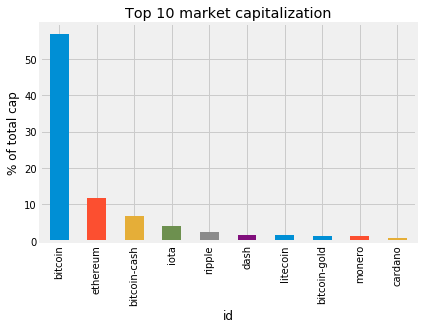

In [181]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap.head(10).copy()
cap10 = cap10.set_index('id', drop=False)

cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()*100))

ax = cap10.plot.bar(x='id', y='market_cap_perc', title=TOP_CAP_TITLE,legend=False)
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

### Making the plot easier to read and more informative

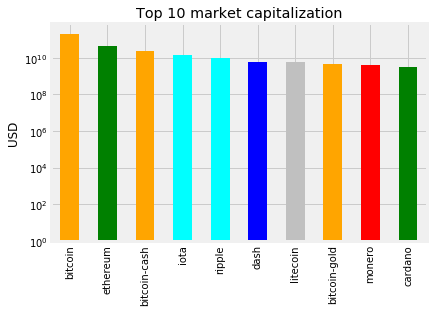

In [184]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'


ax = cap10.plot.bar(x='id', 
                    y='market_cap_usd', 
                    title=TOP_CAP_TITLE, 
                    color=COLORS,
                    log=True,
                    legend=False)


ax.set_ylabel('USD')
ax.set_xlabel('')
plt.show()

### What is going on?! Volatility in cryptocurrencies

In [186]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']].copy()

volatility = volatility.set_index('id')
volatility.dropna(inplace=True)

volatility = volatility.sort_values('percent_change_24h', ascending=True)

volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


In [187]:
volatility.tail()

,percent_change_24h,percent_change_7d
id,,
eaglecoin,272.50,114.73
beatcoin,295.49,132.79
bitzeny,416.04,3360.71
cashcoin,457.86,374.30
fedoracoin,833.01,92.10


### Well, we can already see that things are a bit crazy

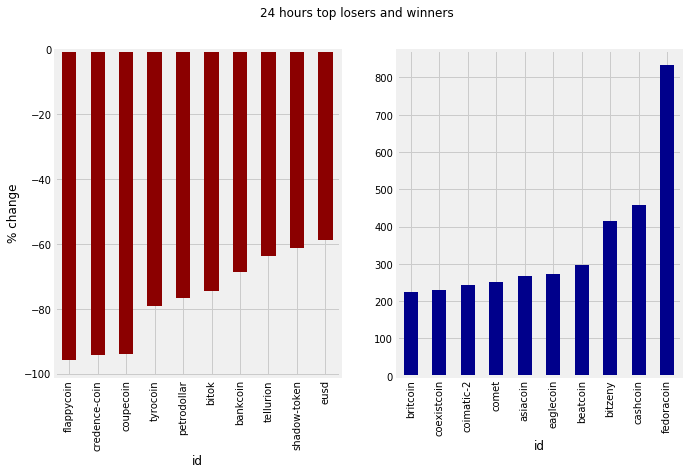

In [188]:
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))

    fig.suptitle(title)

    ax.set_ylabel('% change')

    ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))
    

    return fig, ax

DTITLE = "24 hours top losers and winners"
 
fig, ax = top10_subplot(volatility['percent_change_24h'], DTITLE)
plt.show()

### Ok, those are... interesting. Let's check the weekly Series too.

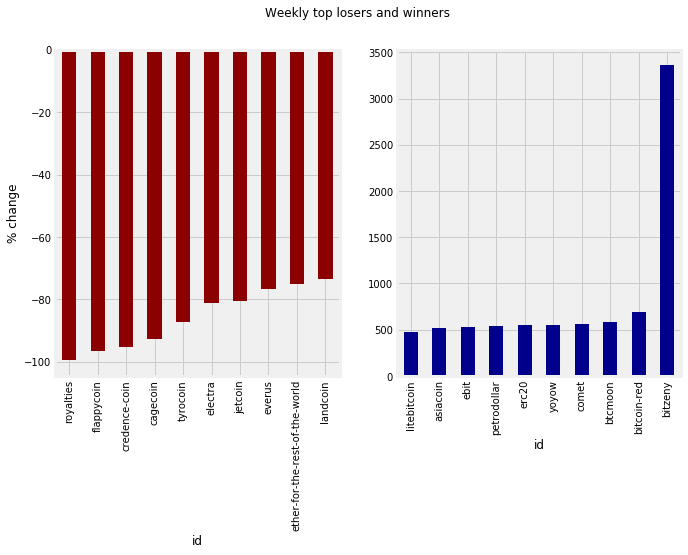

In [190]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d', ascending=True)

WTITLE = "Weekly top losers and winners"


fig, ax = top10_subplot(volatility7d['percent_change_7d'], WTITLE)
plt.show()

### How small is small?

In [191]:
largecaps = cap.query('market_cap_usd > 10_000_000_000')
largecaps.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


In [192]:
len(largecaps)

4

### Most coins are tiny

These are the market cap definitions from Investopedia:
- Large cap: +10 billion
- Mid cap: 2 billion - 10 billion
- Small cap: 300 million - 2 billion
- Micro cap: 50 million - 300 million
- Nano cap: Below 50 million

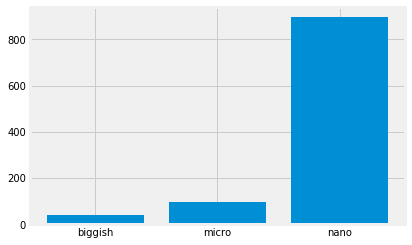

In [193]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd>300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd>50000000 & market_cap_usd<300000000')

# ... and for nano
nano =  capcount('market_cap_usd<50000000')

# Making a list with the 3 counts
values = [biggish,micro, nano]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...
plt.bar(range(len(values)), values, tick_label=LABELS)
plt.show()

## Predicting Credit Card Approvals

### Credit card applications

In [128]:
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('data/cc_approvals.data', header=None)


cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Inspecting the applications

In [129]:
cc_apps.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [130]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


### Handling the missing values (part i)

In [131]:
cc_apps.loc[cc_apps[13].isin(['?'])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
330,b,20.42,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-


In [132]:
cc_apps = cc_apps.replace('?', np.nan)

In [133]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null object
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [134]:
cc_apps[1] = cc_apps[1].astype('float')

In [135]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null float64
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [136]:
cc_apps.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

### Handling the missing values (part ii)

In [137]:
cc_apps.fillna(cc_apps.mean(), inplace=True)

In [138]:
cc_apps.isnull().sum()

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

### Handling the missing values (part iii)

In [144]:
for col in cc_apps:
    if cc_apps[col].dtypes == 'object':
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

In [145]:
cc_apps.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

### Preprocessing the data (part i)

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
le = LabelEncoder()

In [148]:
for col in cc_apps:
    if cc_apps[col].dtypes == 'object':
        cc_apps[col] = le.fit_transform(cc_apps[col])

In [149]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


### Splitting the dataset into train and test sets

In [150]:
from sklearn.model_selection import train_test_split

cc_apps = cc_apps.drop([11,13], axis=1)
cc_apps = cc_apps.values

In [151]:
X = cc_apps[:, 0:13]
y = cc_apps[:, 13]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Preprocessing the data (part ii)

In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

rescaledX_train = scaler.fit_transform(X_train) 
rescaledX_test = scaler.fit_transform(X_test)

### Fitting a logistic regression model to the train set

In [154]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Making predictions and evaluating performance

In [158]:
y_pred = logreg.predict(rescaledX_test)
logreg.score(rescaledX_test, y_test)

0.8421052631578947

In [159]:
accuracy_score(y_test, y_pred)

0.8421052631578947

In [161]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 92,  11],
       [ 25, 100]])

<img src="images/Screenshot from 2019-11-18 09-19-24.png">

### Grid searching and making the model perform better

In [162]:
from sklearn.model_selection import GridSearchCV

tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]


param_grid = dict(tol=tol, max_iter=max_iter)
param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

### Finding the best performing model

In [163]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

rescaledX = scaler.fit_transform(X)

grid_model_result = grid_model.fit(rescaledX,y)


In [164]:
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


In [167]:
logreg = LogisticRegression(max_iter=100, tol=0.01)
logreg.fit(rescaledX_train, y_train)
y_pred = logreg.predict(rescaledX_test)
logreg.score(rescaledX_test, y_test)

0.8421052631578947